In [ ]:
#importing libraries and uploading files
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
#importing data
df = pd.read_csv('Tweets.csv', encoding='latin1')
df.head()

content
0  RT @sadhika_tiwari: A 46-year-old dies after v...
1  RT @mid_day: #MiddayNews | Consent form for #C...
2          RT @Piyu_Nair: @Saltpistachio Covishield!
3  RT @TimesNow: #Breaking | Bharat Biotech to pa...
4  RT @the_fauxy: After No Side Effect Of Covaxin...

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
#data cleaning
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df['clean_content'] = np.vectorize(remove_pattern)(df['content'], "@[\w]*")

In [ ]:
# remove special characters, numbers and punctuations
df['clean_content'] = df['clean_content'].str.replace("[^a-zA-Z#]", " ")
df.head()

content                                      clean_content
0  RT @sadhika_tiwari: A 46-year-old dies after v...  RT   A    year old dies after vaccination in M...
1  RT @mid_day: #MiddayNews | Consent form for #C...  RT   #MiddayNews   Consent form for #Covaxin s...
2          RT @Piyu_Nair: @Saltpistachio Covishield!                                  RT    Covishield 
3  RT @TimesNow: #Breaking | Bharat Biotech to pa...  RT   #Breaking   Bharat Biotech to pay compens...
4  RT @the_fauxy: After No Side Effect Of Covaxin...  RT   After No Side Effect Of Covaxin  Liberal ...

In [ ]:
# remove short words
df['clean_content'] = df['clean_content'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

content                                      clean_content
0  RT @sadhika_tiwari: A 46-year-old dies after v...  year dies after vaccination Muradabad vaccine ...
1  RT @mid_day: #MiddayNews | Consent form for #C...  #MiddayNews Consent form #Covaxin shot cause c...
2          RT @Piyu_Nair: @Saltpistachio Covishield!                                         Covishield
3  RT @TimesNow: #Breaking | Bharat Biotech to pa...  #Breaking Bharat Biotech compensation Covaxin ...
4  RT @the_fauxy: After No Side Effect Of Covaxin...  After Side Effect Covaxin Liberal Bangs Head W...

In [ ]:
#drop column content
df = df.drop(['content'], axis=1)

In [ ]:
#installing libraries
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 45.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ad13c1b059fe8a2fa3890a60e1a0b2b1ff5060e7465c20a99ebb2fae041a277f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompat

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import nltk
nltk.download('stopwords') # run this one time
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['clean_content']=df['clean_content'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#defining lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:

df1 = df.rename({'clean_content': 'Text'}, axis=1) 
df1

Text
0     year dies vaccination Muradabad vaccine Covish...
1     #MiddayNews Consent form #Covaxin shot cause c...
2                                            Covishield
3     #Breaking Bharat Biotech compensation Covaxin ...
4     After Side Effect Covaxin Liberal Bangs Head W...
...                                                 ...
5457        #Covishield #CoronaVaccine https eVoEIrAhOH
5458  prev tweet Opposition must blamed speaking voi...
5459  After Side Effect Covaxin Liberal Bangs Head W...
5460  Tibetan health workers receive #Covishield vac...
5461  heard stories brothers treated differentially ...

[5462 rows x 1 columns]

In [ ]:
 
text_list=df1['Text'].tolist()
print(text_list[1])
tokenized_text = lemmatization(text_list)
print(tokenized_text[1])

#MiddayNews Consent form #Covaxin shot cause concern Read https lcFm https lPwLbdC


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

['consent', 'form', 'shot', 'cause', 'concern', 'https']


/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
#Tokenizing_text
dictionary = corpora.Dictionary(tokenized_text)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_text]


In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
#To get the topics 
lda_model.print_topics()

[(0,
  '0.084*"vaccine" + 0.071*"trial" + 0.050*"phase" + 0.039*"https" + 0.025*"effect" + 0.023*"side" + 0.019*"result" + 0.015*"clinical" + 0.014*"shot" + 0.014*"people"'),
 (1,
  '0.131*"datum" + 0.081*"efficacy" + 0.074*"safety" + 0.070*"government" + 0.066*"people" + 0.061*"good" + 0.058*"effort" + 0.058*"hidden" + 0.057*"shame" + 0.027*"https"'),
 (2,
  '0.088*"dose" + 0.069*"support" + 0.052*"https" + 0.040*"vaccine" + 0.039*"interview" + 0.037*"indian" + 0.036*"whole" + 0.036*"people" + 0.035*"cost" + 0.035*"purchase"'),
 (3,
  '0.062*"http" + 0.053*"today" + 0.039*"https" + 0.039*"last" + 0.037*"scientist" + 0.037*"vaccine" + 0.035*"week" + 0.031*"letter" + 0.031*"supply" + 0.030*"former"'),
 (4,
  '0.066*"vaccine" + 0.045*"safe" + 0.042*"https" + 0.039*"wait" + 0.038*"available" + 0.037*"access" + 0.037*"able" + 0.036*"friend" + 0.036*"research" + 0.036*"decade"'),
 (5,
  '0.036*"vaccine" + 0.030*"death" + 0.028*"evidence" + 0.028*"report" + 0.025*"https" + 0.025*"hospital" +

In [ ]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
from gensim import corpora, models, similarities 
import joblib
import pyLDAvis
from pyLDAvis import gensim_models
import pyLDAvis as gensimvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.365165 -0.010239       1        1  14.839488
4      0.105981 -0.239562       2        1  13.365888
7     -0.158866 -0.054419       3        1  13.303269
8     -0.013354  0.211382       4        1  11.055136
6     -0.147212 -0.006058       5        1  10.304134
9      0.061464  0.198896       6        1   8.763910
2     -0.062645 -0.198174       7        1   8.003962
3     -0.161740 -0.007588       8        1   7.441747
0      0.042660 -0.001707       9        1   6.684986
5     -0.031454  0.107469      10        1   6.237479, topic_info=            Term         Freq        Total Category  logprob  loglift
9              #  2624.000000  2624.000000  Default  30.0000  30.0000
42         datum  1097.000000  1097.000000  Default  29.0000  29.0000
0    vaccination   751.000000   751.000000  Default  28.0000  28.0000
74      efficacy   708.000000   708.000000  Default  27.0000  27.0000
107         dose   363.000000   363.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
14          side    41.151912   178.859535  Topic10  -4.2890   1.3053
406         hour    34.827629   136.783602  Topic10  -4.4559   1.4066
7          https    76.384540  2437.586492  Topic10  -3.6705  -0.6884
480         high    23.426104    44.762867  Topic10  -4.8524   2.1271
27         phase    26.280160   220.078317  Topic10  -4.7375   0.6494

[495 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         3  0.853786           #
9         5  0.095246           #
9         6  0.034289           #
9         8  0.016763           #
170       5  0.986594     COVAXIN
...     ...       ...         ...
731       7  0.954064        xgap
352       9  0.967323  ydsykcuyqm
2         4  0.304740        year
2         5  0.232565        year
2        10  0.457110        year

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 8, 9, 7, 10, 3, 4, 1, 6])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -5.005539396177461

Coherence Score:  0.35250037032786036


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

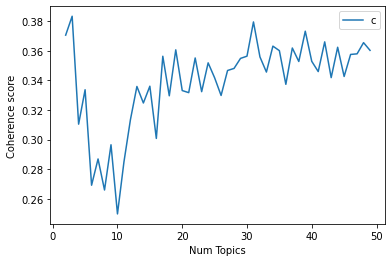

In [ ]:
# Show graph to get the trend for theme
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3705
Num Topics = 3  has Coherence Value of 0.3833
Num Topics = 4  has Coherence Value of 0.3104
Num Topics = 5  has Coherence Value of 0.3337
Num Topics = 6  has Coherence Value of 0.2692
Num Topics = 7  has Coherence Value of 0.2869
Num Topics = 8  has Coherence Value of 0.266
Num Topics = 9  has Coherence Value of 0.2965
Num Topics = 10  has Coherence Value of 0.2498
Num Topics = 11  has Coherence Value of 0.2849
Num Topics = 12  has Coherence Value of 0.3134
Num Topics = 13  has Coherence Value of 0.3359
Num Topics = 14  has Coherence Value of 0.3247
Num Topics = 15  has Coherence Value of 0.3361
Num Topics = 16  has Coherence Value of 0.3008
Num Topics = 17  has Coherence Value of 0.3563
Num Topics = 18  has Coherence Value of 0.3296
Num Topics = 19  has Coherence Value of 0.3606
Num Topics = 20  has Coherence Value of 0.3331
Num Topics = 21  has Coherence Value of 0.3317
Num Topics = 22  has Coherence Value of 0.3551
Num Topics = 23  has C

In [ ]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.101*"vaccine" + 0.084*"https" + 0.069*"#" + 0.027*"dose" + 0.023*"indian" + 0.019*"worker" + 0.018*"support" + 0.016*"profit" + 0.015*"health" + 0.015*"person"'),
 (1,
  '0.159*"#" + 0.072*"https" + 0.061*"vaccine" + 0.027*"vaccination" + 0.024*"covid" + 0.011*"adverse" + 0.010*"worker" + 0.010*"centre" + 0.010*"campaign" + 0.010*"safety"'),
 (2,
  '0.116*"datum" + 0.056*"efficacy" + 0.055*"people" + 0.052*"safety" + 0.052*"government" + 0.047*"good" + 0.045*"effort" + 0.045*"hidden" + 0.045*"shame" + 0.019*"https"'),
 (3,
  '0.064*"vaccine" + 0.036*"https" + 0.033*"safe" + 0.024*"access" + 0.024*"available" + 0.022*"able" + 0.021*"wait" + 0.021*"drug" + 0.021*"decade" + 0.020*"research"'),
 (4,
  '0.030*"vaccination" + 0.024*"beneficiary" + 0.023*"drive" + 0.022*"vaccine" + 0.019*"worker" + 0.015*"total" + 0.014*"https" + 0.013*"official" + 0.012*"site" + 0.011*"form"')]

In [ ]:
# Visualize the topics
from gensim import corpora, models, similarities 
import joblib
import pyLDAvis
from pyLDAvis import gensim_models
import pyLDAvis as gensimvis


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.128868 -0.187924       1        1  26.317638
3     -0.080719  0.129357       2        1  22.248866
1     -0.106995 -0.046751       3        1  21.328382
2      0.302189 -0.070513       4        1  19.210722
4      0.014392  0.175831       5        1  10.894392, topic_info=           Term         Freq        Total Category  logprob  loglift
42        datum  1130.000000  1130.000000  Default  30.0000  30.0000
9             #  2709.000000  2709.000000  Default  29.0000  29.0000
141        good   445.000000   445.000000  Default  28.0000  28.0000
143      hidden   419.000000   419.000000  Default  27.0000  27.0000
145       shame   417.000000   417.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
33         http    48.982074   230.800884   Topic5  -4.6725   0.6668
27        phase    43.941887   219.859680   Topic5  -4.7811   0.6068
7         https    70.827487  2439.119944   Topic5  -4.3037  -1.3222
142  government    39.106217   615.611406   Topic5  -4.8977  -0.5394
9             #    39.959258  2709.265157   Topic5  -4.8761  -1.9997

[313 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         1  0.321489           #
9         2  0.049460           #
9         3  0.602008           #
9         4  0.012550           #
9         5  0.014764           #
...     ...       ...         ...
485       2  0.966562       write
873       2  0.074308        wxru
873       3  0.891700        wxru
505       1  0.947392        xcmH
352       1  0.990604  ydsykcuyqm

[689 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3, 5])

In [ ]:
print('\nPerplexity: ', optimal_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=optimal_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -5.337313402665066

Coherence Score:  0.33366719329236316
